In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

messages = [
    ("buy cheap meds now", 1),  # 1 - spam
    ("hello, how are you?", 0),  # 0 - ham (nie spam)
    ("limited time offer", 1),   # 1 - spam
    ("let's meet tomorrow", 0),  # 0 - ham
]


texts, labels = zip(*messages)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)
y = labels

X_tarin , X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = MultinomialNB()
model.fit(X_tarin, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred)
)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


test_data = [("Hello my name is Adam",1),
             ("Hello he is name's John",0),
             ("Our Adam is not John",1),
             ("Hello my name is Adam",1),
             ("Hello he is name's John",0),
             ("Our Adam is not John",1),
             ("abc bcd ", 0)]


text, label = zip(*test_data)
vectorize = CountVectorizer()

matrix = vectorize.fit_transform(text)
y = label

x_train , x_test, y_train, y_test = train_test_split(matrix, label, test_size=0.2, random_state=22)

model = MultinomialNB()
model.fit(x_train, y_train)

pred = model.predict(x_test)
print(pred)

new = "Hello abc John"

new_vec = vectorize.transform([new])
predv2 = model.predict(new_vec)
print(predv2)



TESTOWANIE MODELU BAYESA

Przeiwdywany wynik: Spam
1________________________________________________________
Dokładność modelu wynosi: 62.5%
2________________________________________________________
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.50      0.67      0.57         3

    accuracy                           0.62         8
   macro avg       0.62      0.63      0.62         8
weighted avg       0.66      0.62      0.63         8

3________________________________________________________
[[3 2]
 [1 2]]
4________________________________________________________

Cross-validation scores (5-fold): [0.5  0.75 0.5  0.5  1.  ]
Średnia dokładność: 0.65
5________________________________________________________


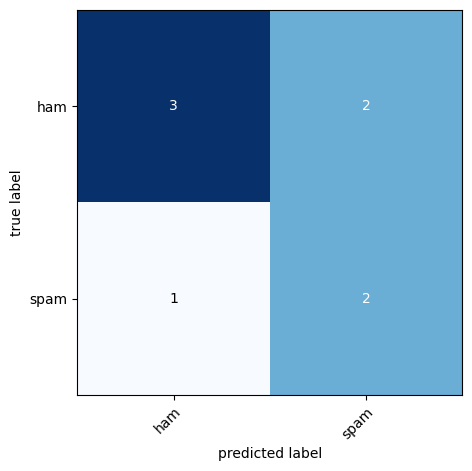

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

ex_mess = [
    ("Congratulations! You've won a free cruise to the Bahamas!", 1),
    ("Don't miss out on this limited-time offer!", 1),
    ("Can we meet tomorrow to discuss the project?", 0),
    ("Reminder: your appointment is scheduled for 3 PM.", 0),
    ("Claim your $1000 gift card now!", 1),
    ("Hi Anna, just checking in to see how you're doing.", 0),
    ("Get cheap meds without prescription – order now!", 1),
    ("Meeting notes from yesterday's team sync", 0),
    ("Exclusive deal for valued customers only", 1),
    ("Are you coming to the birthday party?", 0),
    ("Earn money from home – start today!", 1),
    ("Can you send me the files by Monday?", 0),
    ("This is your final notice to pay your bill!", 1),
    ("Lunch tomorrow?", 0),
    ("Free entry in a weekly prize draw!", 1),
    ("Thanks for your email – I'll respond shortly.", 0),
    ("New online course: Learn Python in 30 days", 0),
    ("Win a brand new iPhone by clicking this link!", 1),
    ("Attached is the invoice for your recent purchase.", 0),
    ("Act now – offer expires soon!", 1)
]


texts , labels = zip(*ex_mess)

vectorizer_2 = CountVectorizer()
text_to_binary_vectors = vectorizer_2.fit_transform(texts)

X_train, X_test, y_train, y_test = train_test_split(text_to_binary_vectors, labels,train_size=0.60, random_state=69 )


model = MultinomialNB()
model.fit(X_train, y_train)

prediction = model.predict(X_test)


new_text = "New online course: Learn Python in 30 days"

new_text_vectorize = vectorizer_2.transform([new_text])
prediction = model.predict(new_text_vectorize)



print(f"Przeiwdywany wynik: {(lambda prediction: 'Spam' if prediction == 0 else 'Ham')(prediction)}")
print("1________________________________________________________")
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, model.predict(X_test))
print(f"Dokładność modelu wynosi: {round(acc * 100, 2)}%")
print("2________________________________________________________")


from sklearn.metrics import classification_report
print(classification_report(y_test , model.predict(X_test)))
print("3________________________________________________________")


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, model.predict(X_test)))
print("4________________________________________________________")


from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, text_to_binary_vectors, labels, cv=5)
print("\nCross-validation scores (5-fold):", scores)
print("Średnia dokładność:", scores.mean())
print("5________________________________________________________")

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, y_pred = model.predict(X_test)
)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5,5), class_names=["ham", "spam"])
plt.show()




22.94755241346897 0.9038659456058731


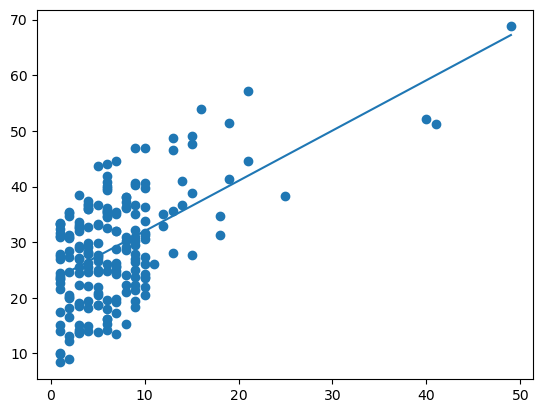

array([[0],
       [1],
       [2],
       [3],
       [5],
       [6],
       [7],
       [8]])

In [41]:
from sklearn.linear_model import LinearRegression
import numpy as np
from scratch.statistics import correlation, standard_deviation, mean, num_friends_good,daily_minutes_good
import matplotlib.pyplot as plt

X = np.array(num_friends_good).reshape(-1,1)
y = np.array(daily_minutes_good)

model = LinearRegression()
model.fit(X, y)

alpha = model.intercept_
beta = model.coef_[0]
print(alpha,beta)

r_squared = model.score(X, y)

ys = [alpha + x * beta for x in num_friends_good]
xs = num_friends_good

plt.plot(xs, ys)
plt.scatter(num_friends_good, daily_minutes_good)
plt.show()

test_X = np.array([range(4),range(5,9)]).reshape(-1,1)
test_X

# REGRESJA

## 1. Zaleznosci

<div class="alert alert-secondary" role="alert">
  Liniowosc
</div>


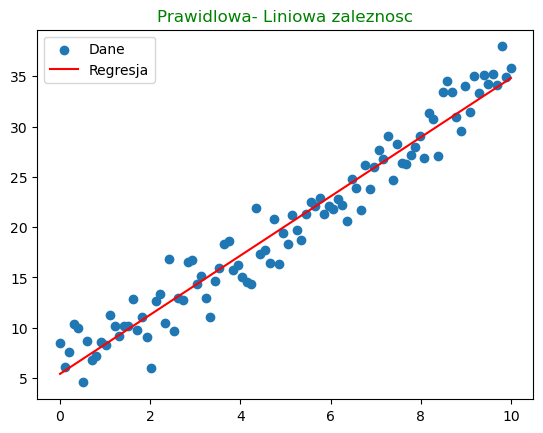

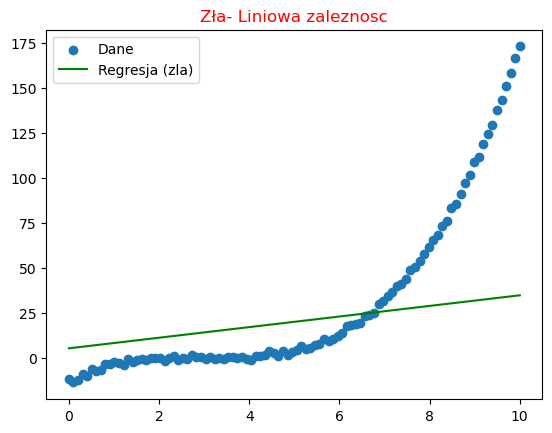

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

np.random.seed(0)

#PRAWIDLOWA REGRESJA 

x = np.linspace(0,10,100)
y = 3 * x + 5 + np.random.normal(0,2,100) #Generator 100 liczb z rozkladu normalnego

model = LinearRegression().fit(x.reshape(-1,1), y)
y_pred = model.predict(x.reshape(-1,1))

plt.scatter(x,y, label = 'Dane')
plt.plot(x,y_pred, color='red', label = 'Regresja')
plt.title("Prawidlowa- Liniowa zaleznosc", color ='green')
plt.legend()
plt.show()

#BLEDNA REGRESJA

y_nolin = 0.5 * (x-3)**3 +np.random.normal(0,1,100)
model = LinearRegression().fit(x.reshape(-1,1), y_nolin)
y_pred2 = model.predict(x.reshape(-1,1))

plt.scatter(x, y_nolin, label = "Dane")
plt.plot(x, y_pred, color = 'green', label = 'Regresja (zla)')
plt.title("Zła- Liniowa zaleznosc", color = 'red')
plt.legend()
plt.show()





<div class="alert alert-secondary" role="alert">
  Niezależność obserwacji
</div>

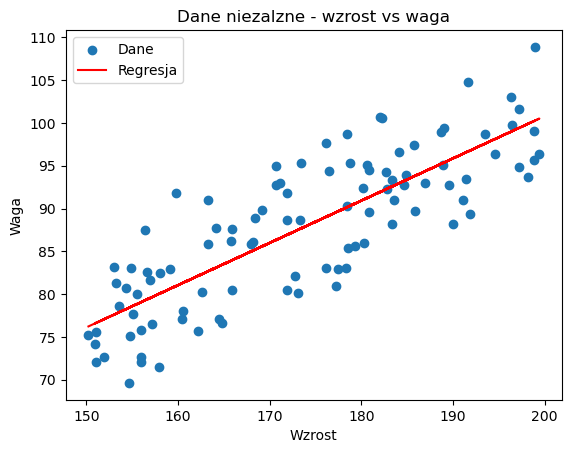

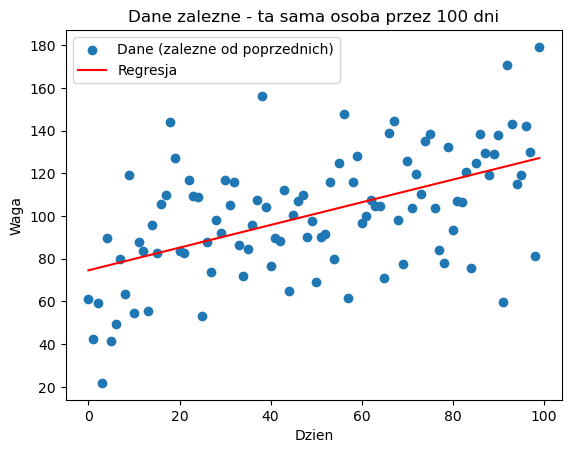

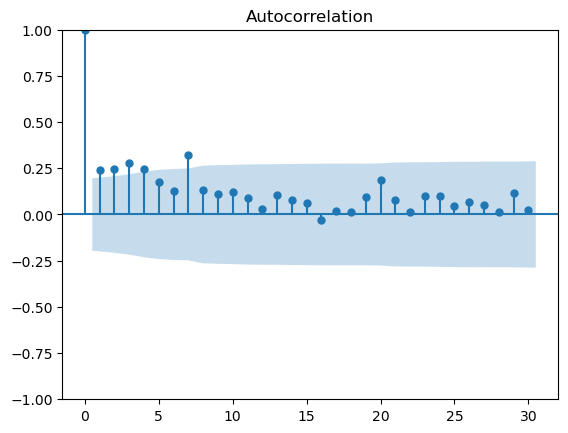

Statystyka Durbin-Watsona: 1.9849645019260058


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.stattools import durbin_watson
np.random.seed(0)

#POPRAWNA NIEZALEZNOSC OBSERWACJI 

x = np.random.uniform(150,200,100) #Losowanie wartosci z rozkladu jednostajnego (taka sama szansa na wystapienie , 100 liczb przedzial 150-200)

y = 0.5 * x + np.random.normal(0,5,100) #waga

model = LinearRegression().fit(x.reshape(-1,1), y)
y_pred = model.predict(x.reshape(-1,1))

plt.scatter(x,y ,label='Dane')
plt.plot(x, y_pred, color = 'red', label='Regresja')
plt.title("Dane niezalzne - wzrost vs waga")
plt.xlabel("Wzrost")
plt.ylabel("Waga")
plt.legend()
plt.show()

#ZŁA NIEZALEZNOSC OBSERWACJI

x = np.arange(0,100) #dni
y = 70 + 0.5 *x + np.random.normal(0,25,100)

# skorelowanie danych
for i in range(1,len(y)):
    y[i] += 0.1 * y[i-1] #0.1 - zaleznosc nastepnej danej od poprzedniej 

model = LinearRegression().fit(x.reshape(-1,1), y)
y_pred = model.predict(x.reshape(-1,1))

plt.scatter(x,y,label = "Dane (zalezne od poprzednich)", marker = 'o')
plt.plot(x, y_pred, color = 'red', label = 'Regresja')
plt.title("Dane zalezne - ta sama osoba przez 100 dni")
plt.xlabel("Dzien")
plt.ylabel("Waga")
plt.legend()
plt.show()

# TESTY ZALEZNOSCI 
plot_acf(y, lags=30)
plt.show()

residuals = y - y_pred
dw_statistic = durbin_watson(residuals) # TEST SPARWDZAJACY CZY RESZTY SA OD SIEBIE ZALEZNE 
print(f"Statystyka Durbin-Watsona: {dw_statistic}") #IM BLIZEJ 2 TYM RESZTY SA OD SIEBIE BARDZIEJ NIEZALEZNE

<div class="alert alert-secondary" role="alert">
 Homoskedastyczność (stała wariancja błędów)
</div>

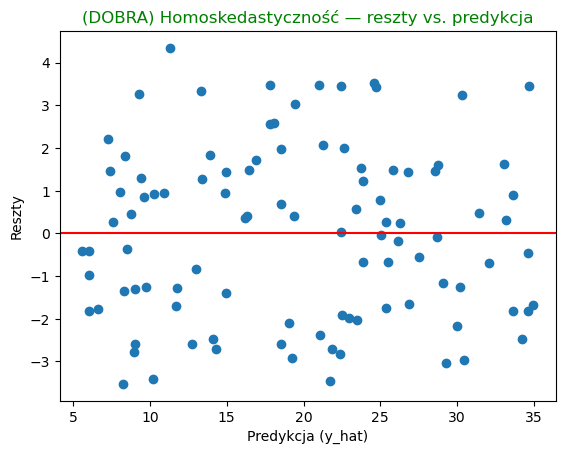

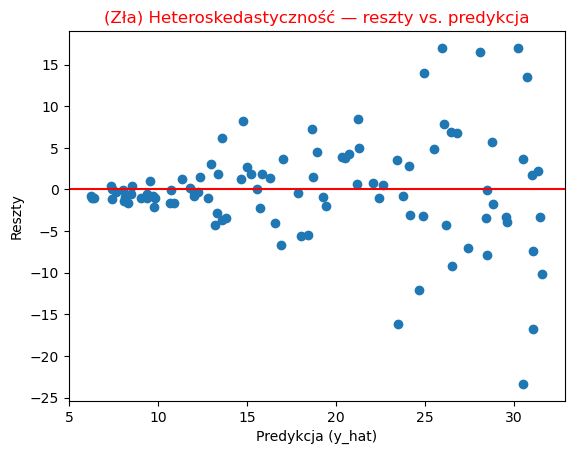

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(0)
x = np.random.uniform(0,10,100)
y = 3* x +5 + np.random.normal(0,2,100)

model = LinearRegression().fit(x.reshape(-1,1), y)
y_pred = model.predict(x.reshape(-1,1))

residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color = 'red')
plt.title("(DOBRA) Homoskedastyczność — reszty vs. predykcja", color = 'green')
plt.xlabel("Predykcja (y_hat)")
plt.ylabel("Reszty")
plt.show()

x = np.random.uniform(0, 10, 100)
noise = np.random.normal(0, x)  # im większe x, tym większy szum!
y = 3 * x + 5 + noise

model = LinearRegression().fit(x.reshape(-1,1), y)
y_pred = model.predict(x.reshape(-1,1))
residuals = y - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.title("(Zła) Heteroskedastyczność — reszty vs. predykcja", color = 'red')
plt.xlabel("Predykcja (y_hat)")
plt.ylabel("Reszty")
plt.show()






<div class="alert alert-secondary" role="alert">
    Normalność reszt (błędów)
</div>

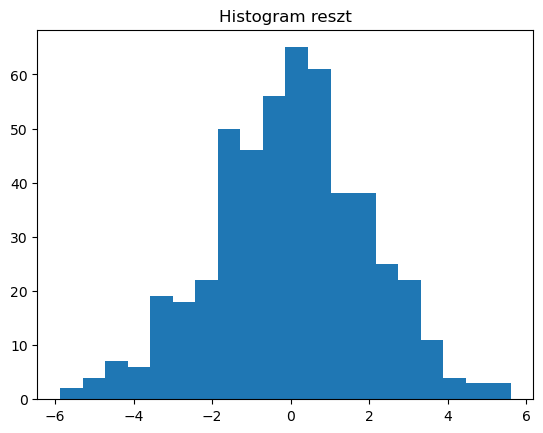

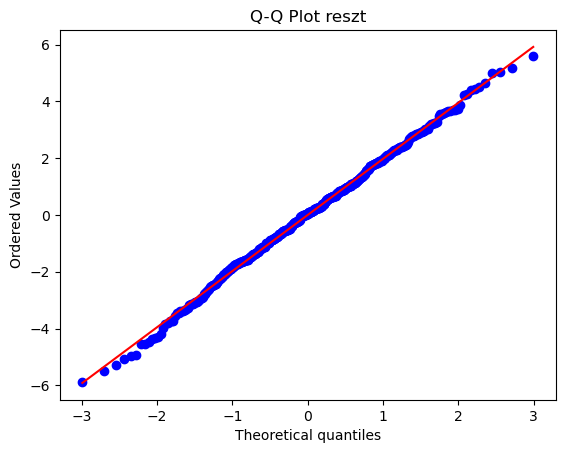

In [63]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(0)

x = np.random.uniform(0, 10, 500)
y = 3 * x + 0.5 + np.random.normal(0, 2, 500)

model = LinearRegression().fit(x.reshape(-1, 1), y)
y_pred = model.predict(x.reshape(-1,1))
residuals = y - y_pred

# Histogram
plt.hist(residuals, bins=20)
plt.title("Histogram reszt")
plt.show()

# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot reszt")
plt.show()


<div class="alert alert-secondary" role="alert">
    Brak multikolinearności (Regresja wielokrotna)
</div>

## Regresja LINIOWA

Współczynnik nachylenia (beta): 4.687563475149879
Wyraz wolny (alpha): 13.301155964172978


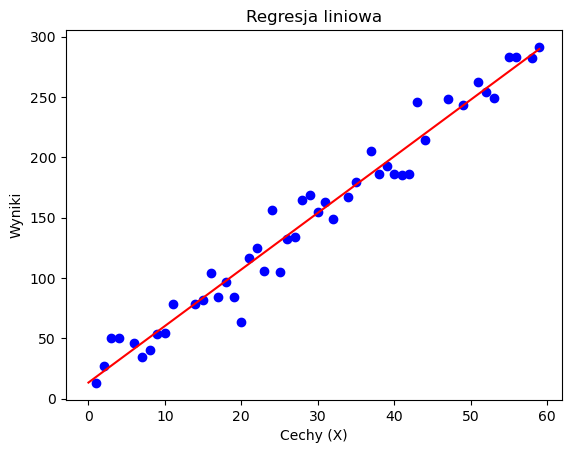

In [95]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import scipy.stats as stats

np.random.seed(0)
x = np.array(range(60)).reshape(-1,1)
y = 2 + x.flatten() * 5 + np.random.normal(0, 15, 60)


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

slope = model.coef_[0]
intercept = model.intercept_

y_pred = model.predict(x_test)


print(f"Współczynnik nachylenia (beta): {slope}")
print(f"Wyraz wolny (alpha): {intercept}")

plt.scatter(x_train,y_train,color = "blue")
plt.plot(x , model.predict(x), color = 'red')
plt.xlabel("Cechy (X)")
plt.ylabel("Wyniki")
plt.title("Regresja liniowa")
plt.show()

<div class="alert alert-secondary" role="alert">
    OLS Regression Results oraz reszty
</div>

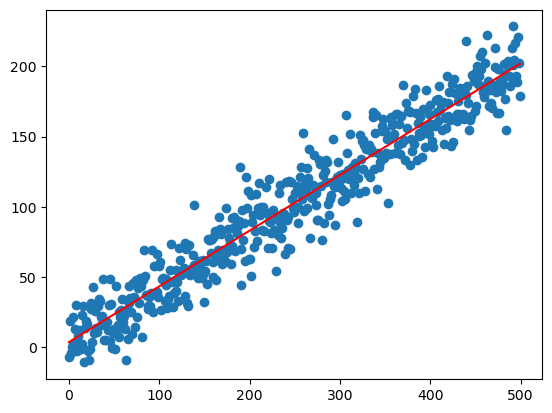

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     6914.
Date:                Wed, 23 Apr 2025   Prob (F-statistic):          3.63e-294
Time:                        20:39:49   Log-Likelihood:                -2076.2
No. Observations:                 500   AIC:                             4156.
Df Residuals:                     498   BIC:                             4165.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5948      1.377      2.611      0.0

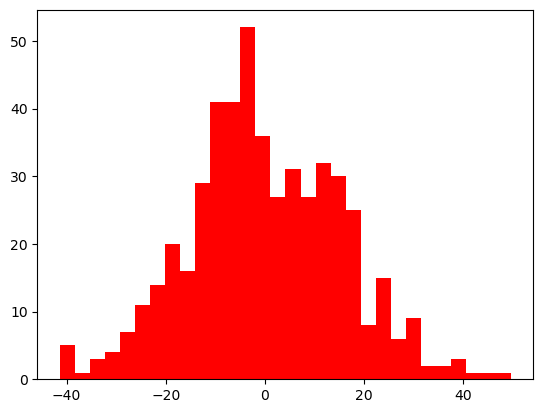

In [279]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.arange(500).reshape(-1,1)
y = 2 + x.flatten() *0.4 + np.random.normal(0,15,500)

model = LinearRegression()
model.fit(x,y)
residuals = y - model.predict(x)

plt.scatter(x,y)
plt.plot(x,model.predict(x), color = 'red')
plt.show()

plt.hist(residuals, color = 'red', bins=30)

X = sm.add_constant(x)  # dodajemy β₀
model = sm.OLS(y, X).fit()
print(model.summary())


<div class="alert alert-secondary" role="alert">
  1a. Outliery (wartości odstające) - z_score
</div>

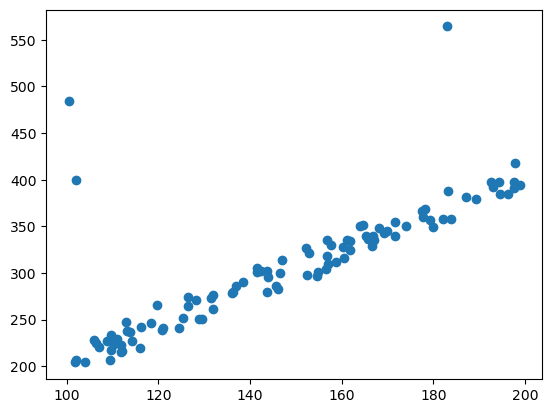

Indeks w oryginalnych danych: 98,
 x: 182.89400292173633,
 y: 564.2326808082992,
 Z-scores: [1.23532503 3.9482907 ]

Indeks w oryginalnych danych: 99,
 x: 100.46954761925471,
 y: 484.11388682876,
 Z-scores: [1.6236412 2.7219616]



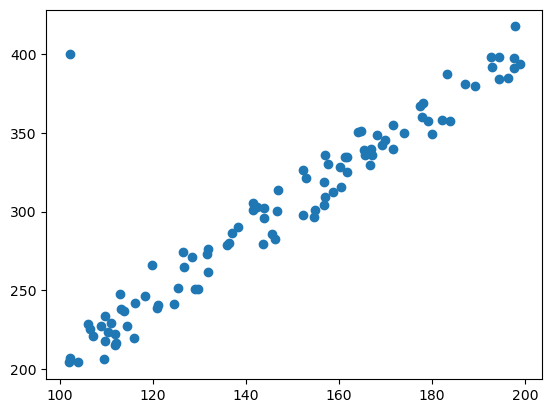

In [253]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)
x = np.array(np.random.uniform(100,200,100))
y = 3 + x.flatten() * 2 + np.random.normal(0,10,100) 
y[-3:] = y[-3:] + np.array([200,200,280])

plt.scatter(x,y)
plt.show()

outliners = []
z_scores = np.abs(stats.zscore(np.column_stack((x,y))))
for i, z in enumerate(z_scores):
    if z[0] > 2 or z[1] > 2:
        print(f"Indeks w oryginalnych danych: {i},\n x: {x[i]},\n y: {y[i]},\n Z-scores: {z}")
        print()
        outliners.append(i)

x = np.delete(x,outliners)
y = np.delete(y,outliners)
plt.scatter(x,y)


<div class="alert alert-secondary" role="alert">
  1b. Outliery (wartości odstające) - z_score NIE DZIAŁA W PEŁNI
  
  Leverage
</div>

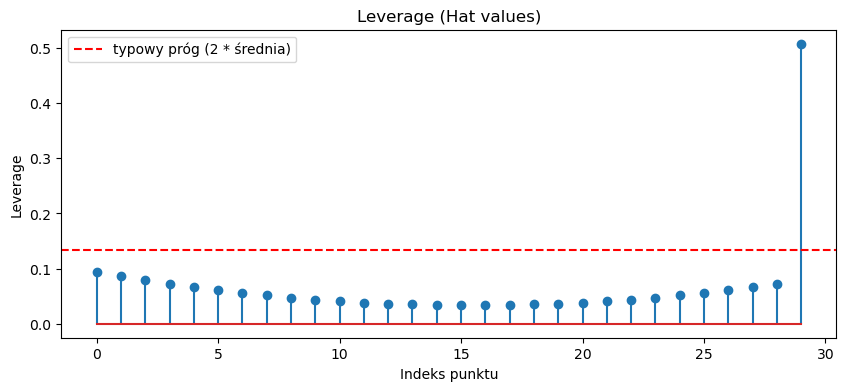

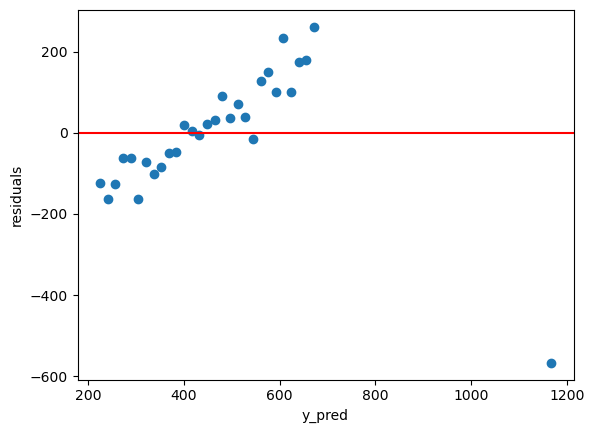

209.44154627077353
1.5954357571306246


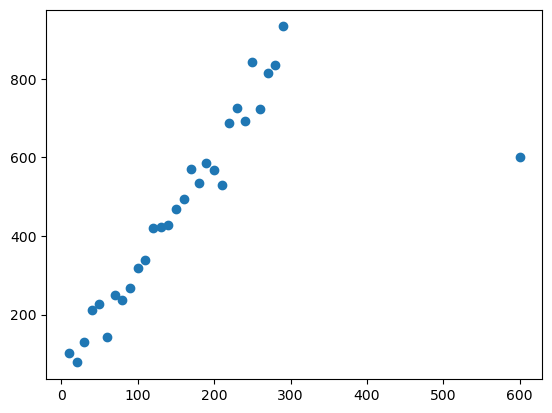

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import statsmodels.api as sm

np.random.seed(0)
x = np.arange(10,300,10).reshape(-1,1)
y = 2 + 3* x.flatten() + np.random.normal(0,40, size=x.shape[0])

x = np.append(x,[[600]]).reshape(-1,1)
y = np.append(y,600)

X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
influence = model.get_influence()
leverage = influence.hat_matrix_diag

y_pred = model.predict(X)
residuals = y - y_pred

alpha = model.params[0]
beta = model.params[1]

plt.figure(figsize=(10, 4))
plt.stem(leverage)
plt.axhline(2 * np.mean(leverage), color='red', linestyle='--', label='typowy próg (2 * średnia)')
plt.title("Leverage (Hat values)")
plt.xlabel("Indeks punktu")
plt.ylabel("Leverage")
plt.legend()
plt.show()


plt.scatter(y_pred,residuals) 
plt.axhline(0, color = 'red')
plt.xlabel("y_pred")
plt.ylabel("residuals")
plt.show()

plt.scatter(x,y)
print(alpha)
print(beta)

<div class="alert alert-secondary" role="alert">
  1c. Outliery (wartości odstające) - z_score NIE DZIAŁA W PEŁNI
  
  Cook's Distance
  
</div>

Cook's Distance dla poszczególnych punktów: [0.875      0.01273148 0.26849112 4.83333333]


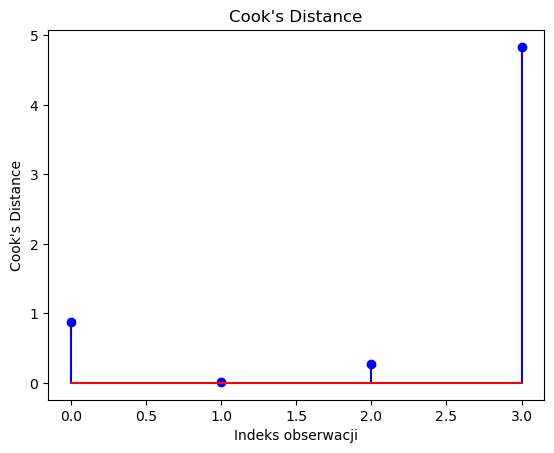

In [34]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Przykładowe dane
X = np.array([1, 2, 3, 5])
y = np.array([1, 2, 3, 16])

# Dodajemy stałą do X (intercept)
X = sm.add_constant(X)

# Dopasowanie modelu regresji
model = sm.OLS(y, X).fit()

# Obliczamy Cook's Distance
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Wyświetlamy Cook's Distance
print("Cook's Distance dla poszczególnych punktów:", cooks_d)

# Wykres Cook's Distance
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt="o", linefmt="b-", basefmt="r-")
plt.title("Cook's Distance")
plt.xlabel("Indeks obserwacji")
plt.ylabel("Cook's Distance")
plt.show()


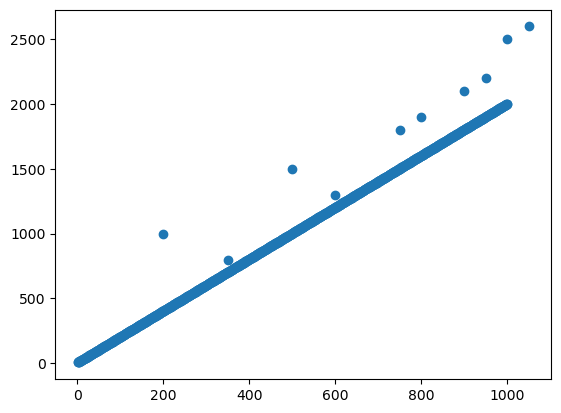

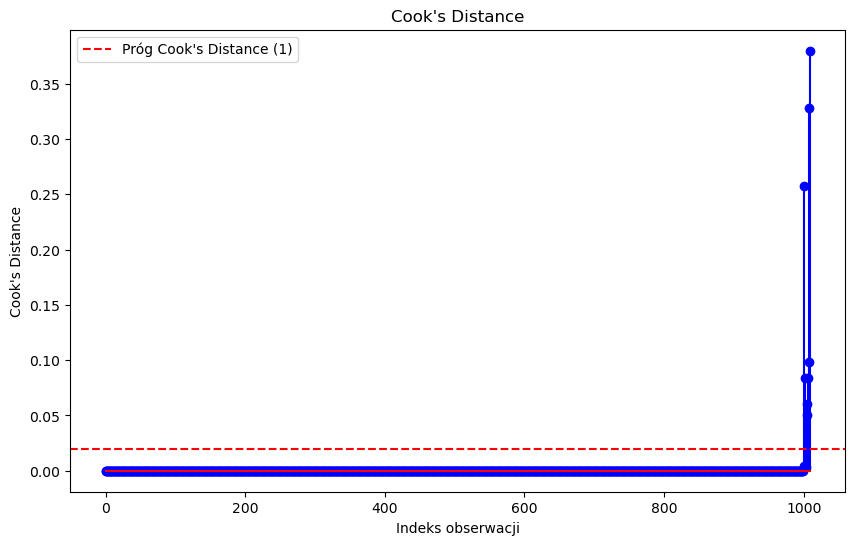


Indeksy punktów odstających (wysokie Cook's Distance):
[1000 1002 1004 1005 1006 1007 1008 1009]


In [44]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


np.random.seed(42)  

X = np.arange(1, 1001)

y = 2 * X + 3

outliers_X = np.array([200, 350, 500, 600, 750, 800, 900, 950, 1000, 1050])
outliers_y = np.array([1000, 800, 1500, 1300, 1800, 1900, 2100, 2200, 2500, 2600])

X = np.concatenate([X, outliers_X])
y = np.concatenate([y, outliers_y])
plt.scatter(X,y)

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

threshold = 0.02
outliers = np.where(cooks_d > threshold)[0]

plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt="o", linefmt="b-", basefmt="r-")
plt.axhline(y=threshold, color='r', linestyle='--', label='Próg Cook\'s Distance (1)')
plt.title("Cook's Distance")
plt.xlabel("Indeks obserwacji")
plt.ylabel("Cook's Distance")
plt.legend()
plt.show()

print("\nIndeksy punktów odstających (wysokie Cook's Distance):")
print(outliers)




## WIELORAKA

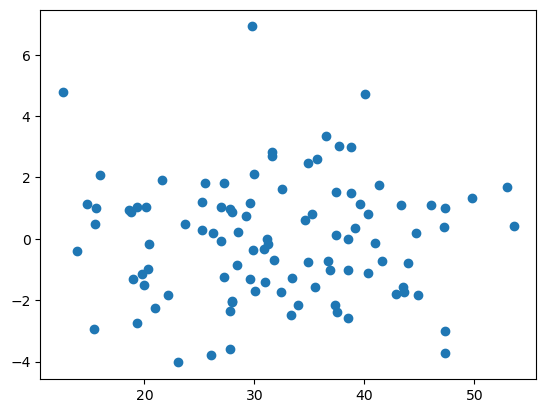

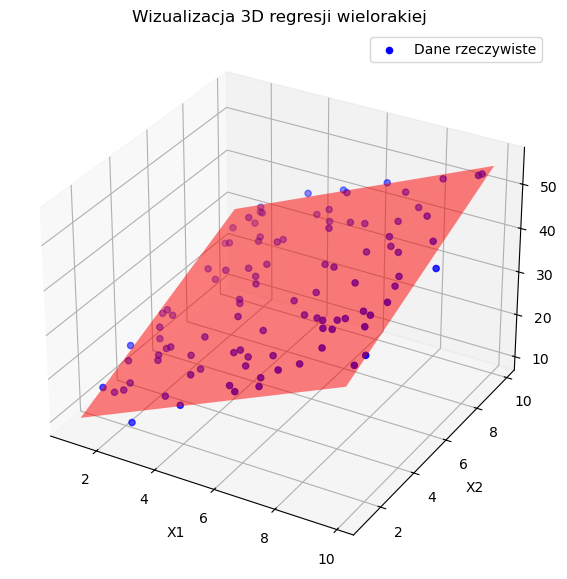

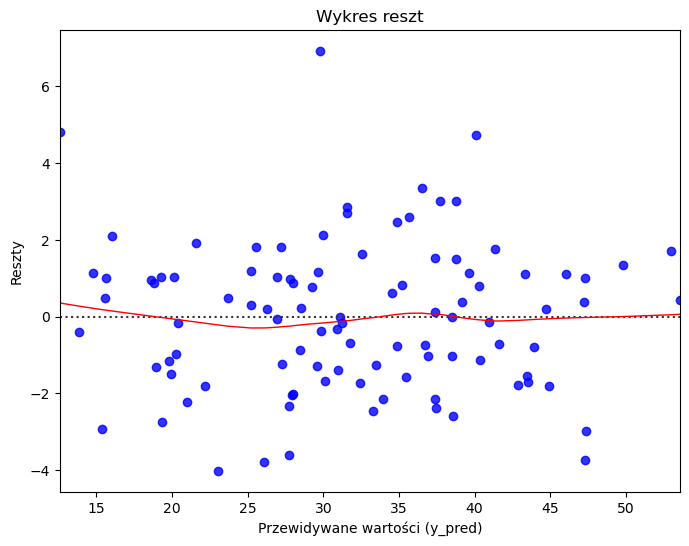

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Generowanie danych
np.random.seed(42)
X1 = np.random.uniform(1, 10, 100)
X2 = np.random.uniform(1, 10, 100)
Y = 5 + 3 * X1 + 2 * X2 + np.random.normal(0, 2, 100)

# Tworzenie macierzy X
X = np.column_stack((X1, X2))

# Dopasowanie modelu regresji
model = LinearRegression()
model.fit(X, Y)

# Predykcja wartości Y na podstawie modelu
y_pred = model.predict(X)
residuals = Y - y_pred

plt.scatter(y_pred, residuals)

# Tworzenie wykresu 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Wizualizacja punktów rzeczywistych
ax.scatter(X1, X2, Y, color='blue', label='Dane rzeczywiste')

# Generowanie punktów do rysowania powierzchni regresji
x1_range = np.linspace(X1.min(), X1.max(), 20)
x2_range = np.linspace(X2.min(), X2.max(), 20)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
X_mesh = np.column_stack((x1_mesh.ravel(), x2_mesh.ravel()))
y_mesh = model.predict(X_mesh)

# Rysowanie powierzchni regresji
ax.plot_surface(x1_mesh, x2_mesh, y_mesh.reshape(x1_mesh.shape), color='red', alpha=0.5, rstride=100, cstride=100)

# Etykiety osi
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Tytuł
ax.set_title('Wizualizacja 3D regresji wielorakiej')

# Legenda
ax.legend()

# Wyświetlenie wykresu
plt.show()

plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="blue", line_kws={"color": "red", "lw": 1})
plt.xlabel("Przewidywane wartości (y_pred)")
plt.ylabel("Reszty")
plt.title("Wykres reszt")
plt.show()

### BOOTSTRAP

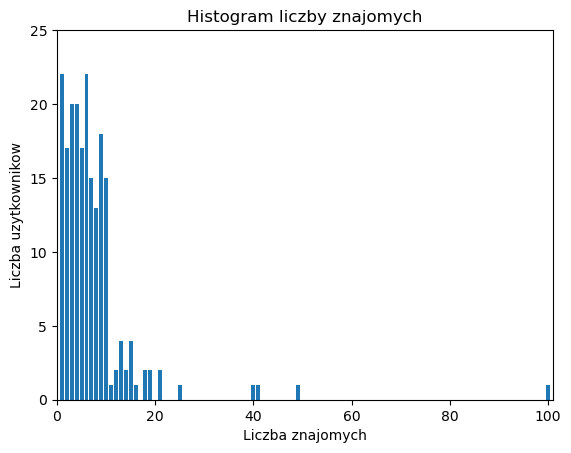

[200.1679719916963, 0.9222526743846314, 0.9666447681571757, 200.01804957968866, 0.9222526743846314, 0.8887138050337359, 200.11281952103315, 200.12311090132062, 0.909721623490725, 0.9222526743846314, 200.01804957968866, 200.11303032936615, 200.14800239739574, 0.9222526743846314, 0.8887138050337359, 200.11992763461166, 200.01323431653248, 200.11281952103315, 0.8726582288309827, 200.10080426696908, 0.909721623490725, 0.7363137762835752, 0.9666447681571757, 200.01804957968866, 0.9222526743846314, 0.8726582288309827, 200.13599271525217, 99.89271459634007, 200.10080426696908, 0.9222526743846314, 0.8424791874618099, 0.909721623490725, 0.8691491793181783, 200.12311090132062, 200.11992763461166, 200.13599271525217, 0.8887138050337359, 200.11281952103315, 200.10080426696908, 99.89271459634007, 200.01804957968866, 0.8691491793181783, 0.8691491793181783, 200.11303032936615, 0.8691491793181783, 0.8691491793181783, 0.6205997365716664, 0.8390482690126957, 0.9222526743846314, 0.9222526743846314, 200.1

In [29]:
from typing import TypeVar, Callable, List
import random

X = TypeVar('X')
Stat = TypeVar('Start')

def bootstrap_sample(data: List[X]) -> List[X]:
    return [random.choice(data) for _ in data]

def bootstrap_statistic(data: List[X],
                        stats_fn: Callable[[List[X]], Stat],
                        num_samples: int) -> List[Stat]:
    return [stats_fn(bootstrap_sample(data)) for _ in range(num_samples)]

close_to_100 = [99.5 + random.random() for _ in range(101)]

far_from_100 = ([99.5 + random.random()]+
                [random.random() for _ in range(50)] +
                [200 + random.random() for _ in range(50)])

from scratch.statistics import median, standard_deviation
import numpy as np

medians_close = bootstrap_statistic(close_to_100, median, 100)

medians_far = bootstrap_statistic(far_from_100, median, 100)

print(medians_far)


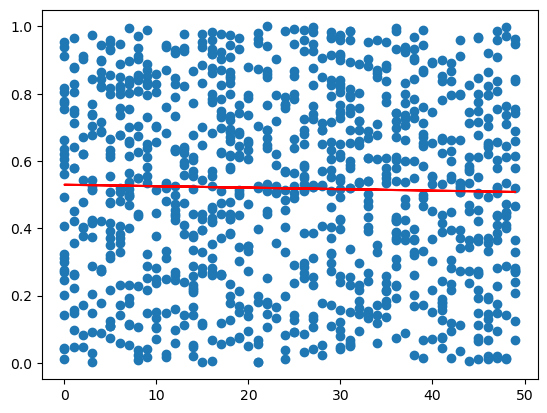

alpha: -0.00043809215364326646
beta: 0.5294750796678122


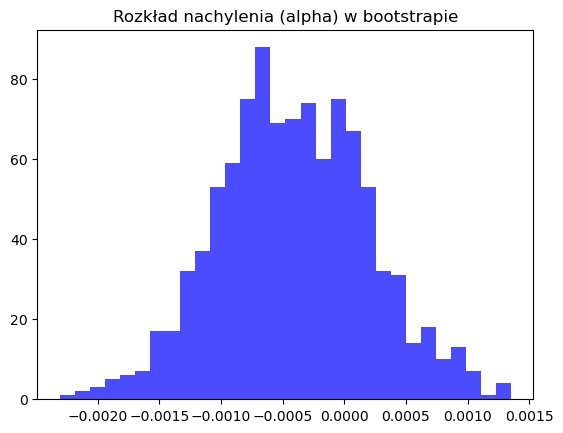

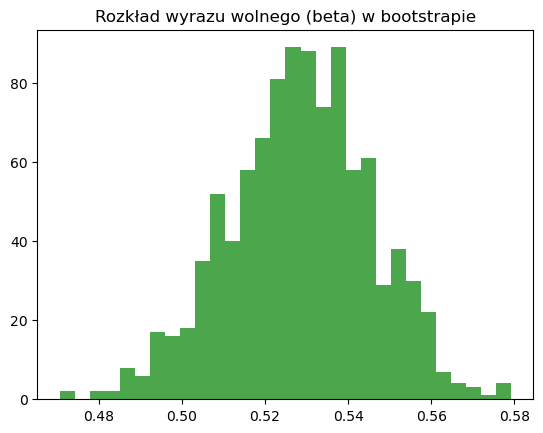

Średni alpha (nachylenie) z bootstrapu: -0.00040948189227657056
Średni beta (wyraz wolny) z bootstrapu: 0.5284814308383545
Odchylenie standardowe alpha: 0.0006096557494326194
Odchylenie standardowe beta: 0.01716398650340832


In [30]:
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt

np.random.seed(5)
x = np.array([np.random.randint(0,50) for _ in range(1001)])
x_t = x.reshape(-1,1)
y = np.array([np.random.random() for _ in range(1001)])

model = LinearRegression()
model.fit(x_t,y)
alpha = model.coef_[0]
beta = model.intercept_

plt.scatter(x_t,y)
plt.plot(x_t, model.predict(x_t), color= 'red')
plt.show()

print(f"alpha: {alpha}")
print(f"beta: {beta}")

def bootstrap_sample(data, n):
    return [random.choice(data)for _ in range(n)]

def bootstrap_statistic(data_x, data_y, model, num_samples):
    alphas = []
    betas = []

    for _ in range(num_samples):
        sample_indices = bootstrap_sample(list(range(len(data_x))), len(data_x))

        x_Sample = data_x[sample_indices]
        y_Sample = data_y[sample_indices]

        model.fit(x_Sample.reshape(-1,1), y_Sample)

        alphas.append(model.coef_[0])
        betas.append(model.intercept_)

    return alphas, betas


num_samples = 1000

alphas_bootstrap, betas_bootstrap = bootstrap_statistic(x, y, model, num_samples)
plt.hist(alphas_bootstrap, bins=30, color='blue', alpha=0.7)
plt.title('Rozkład nachylenia (alpha) w bootstrapie')
plt.show()
plt.hist(betas_bootstrap, bins=30, color='green', alpha=0.7)
plt.title('Rozkład wyrazu wolnego (beta) w bootstrapie')
plt.show()
alpha_mean = np.mean(alphas_bootstrap)
beta_mean = np.mean(betas_bootstrap)

alpha_std = np.std(alphas_bootstrap)
beta_std = np.std(betas_bootstrap)

print(f"Średni alpha (nachylenie) z bootstrapu: {alpha_mean}")
print(f"Średni beta (wyraz wolny) z bootstrapu: {beta_mean}")

print(f"Odchylenie standardowe alpha: {alpha_std}")
print(f"Odchylenie standardowe beta: {beta_std}")
